# CNN for AED with Keras/TensorFlow

Date: February 29, 2019

Neural network: input MFSCs to CNN

## Preparing data set for CNN

In [2]:
DATASET_FOLDER = '../dataset/data_environment'

%run ../oscilloscope/script/dataset.py

ds = DataSet(DATASET_FOLDER)
train_data, train_labels, test_data, test_labels = ds.generate(flatten=False)
shape = ds.shape
class_labels = ds.class_labels

((420, 64, 40, 1), (180, 64, 40, 1))

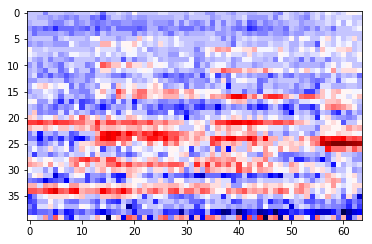

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(np.rot90(train_data[0].reshape(ds.shape)), cmap='seismic')
train_data.shape, test_data.shape

### CNN model

In [4]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(4, (3, 3), activation='relu', input_shape=(*shape, 1)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(class_labels), activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 38, 4)         40        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 19, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 17, 8)         296       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 8, 8)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 6, 16)         1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 3, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)               0         
__________

In [5]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

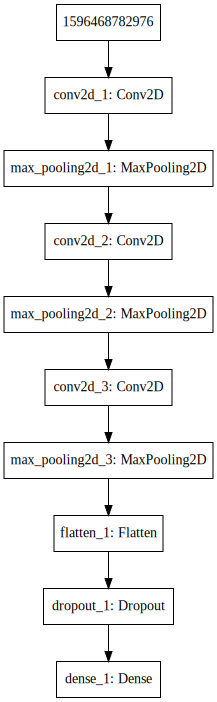

In [6]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Training CNN

In [7]:
EPOCHS = 40
history = model.fit(train_data, train_labels, epochs=EPOCHS, validation_data=(test_data, test_labels))

Train on 420 samples, validate on 180 samples
Epoch 1/40
420/420 [==============================] - 3s 8ms/step - loss: 1.7985 - acc: 0.2405 - val_loss: 1.6452 - val_acc: 0.3444
Epoch 2/40
420/420 [==============================] - 3s 6ms/step - loss: 1.6502 - acc: 0.3000 - val_loss: 1.4857 - val_acc: 0.5222
Epoch 3/40
420/420 [==============================] - 3s 6ms/step - loss: 1.4860 - acc: 0.3810 - val_loss: 1.2257 - val_acc: 0.6278
Epoch 4/40
420/420 [==============================] - 3s 6ms/step - loss: 1.3036 - acc: 0.4619 - val_loss: 0.9928 - val_acc: 0.6833
Epoch 5/40
420/420 [==============================] - 3s 6ms/step - loss: 1.1293 - acc: 0.5571 - val_loss: 0.8902 - val_acc: 0.6722
Epoch 6/40
420/420 [==============================] - 3s 6ms/step - loss: 1.0123 - acc: 0.6000 - val_loss: 0.7843 - val_acc: 0.7222
Epoch 7/40
420/420 [==============================] - 3s 6ms/step - loss: 0.9530 - acc: 0.6190 - val_loss: 0.7269 - val_acc: 0.7111
Epoch 8/40
420/420 [==========

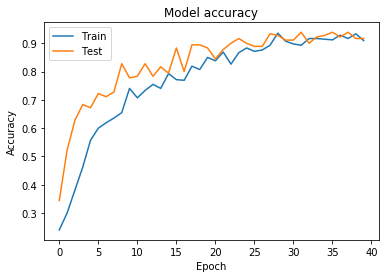

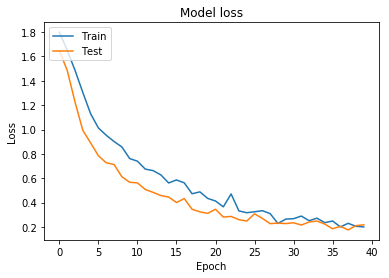

In [8]:
%run history.py
%matplotlib inline

plot_accuracy(history)
plot_loss(history)

## Save the model

In [9]:
import datetime

dt = datetime.datetime.today().strftime('%Y%m%d%H%M%S')
filename = DATASET_FOLDER + '/cnn_for_aed_{}.h5'.format(dt)
model.save(filename)

## Load the model

In [10]:
del model
model = models.load_model(filename)

## Confirmation

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
layer_outputs = [layer.output for layer in model.layers]
#layer_outputs

In [13]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test_data)
#activations[0][0,:,:,0].shape

In [14]:
class_labels

['train', 'station', 'cafe', 'mall', 'port', 'street']

In [15]:
(activations[-1][:10]*100).astype(int)

array([[ 0,  0, 99,  0,  0,  0],
       [12, 87,  0,  0,  0,  0],
       [ 8,  5,  0,  1, 34, 50],
       [ 0,  0,  0,  0,  0, 99],
       [ 2, 96,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 74, 23],
       [ 0,  0,  0,  0,  0, 99],
       [ 2,  0,  0,  0,  0, 97],
       [ 0,  0,  0,  2, 90,  6],
       [ 0,  0,  0, 99,  0,  0]])

In [16]:
test_labels[:10].astype(int)

array([[0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0]])